<h2>Problem statement </h2>
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:<br><br>

1. Which variables are significant in predicting the demand for shared bikes.<br>
2. How well those variables describe the bike demands


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install scipy==1.2 --upgrade

In [3]:
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [4]:
bike_df= pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike_df.shape

(730, 16)

In [6]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


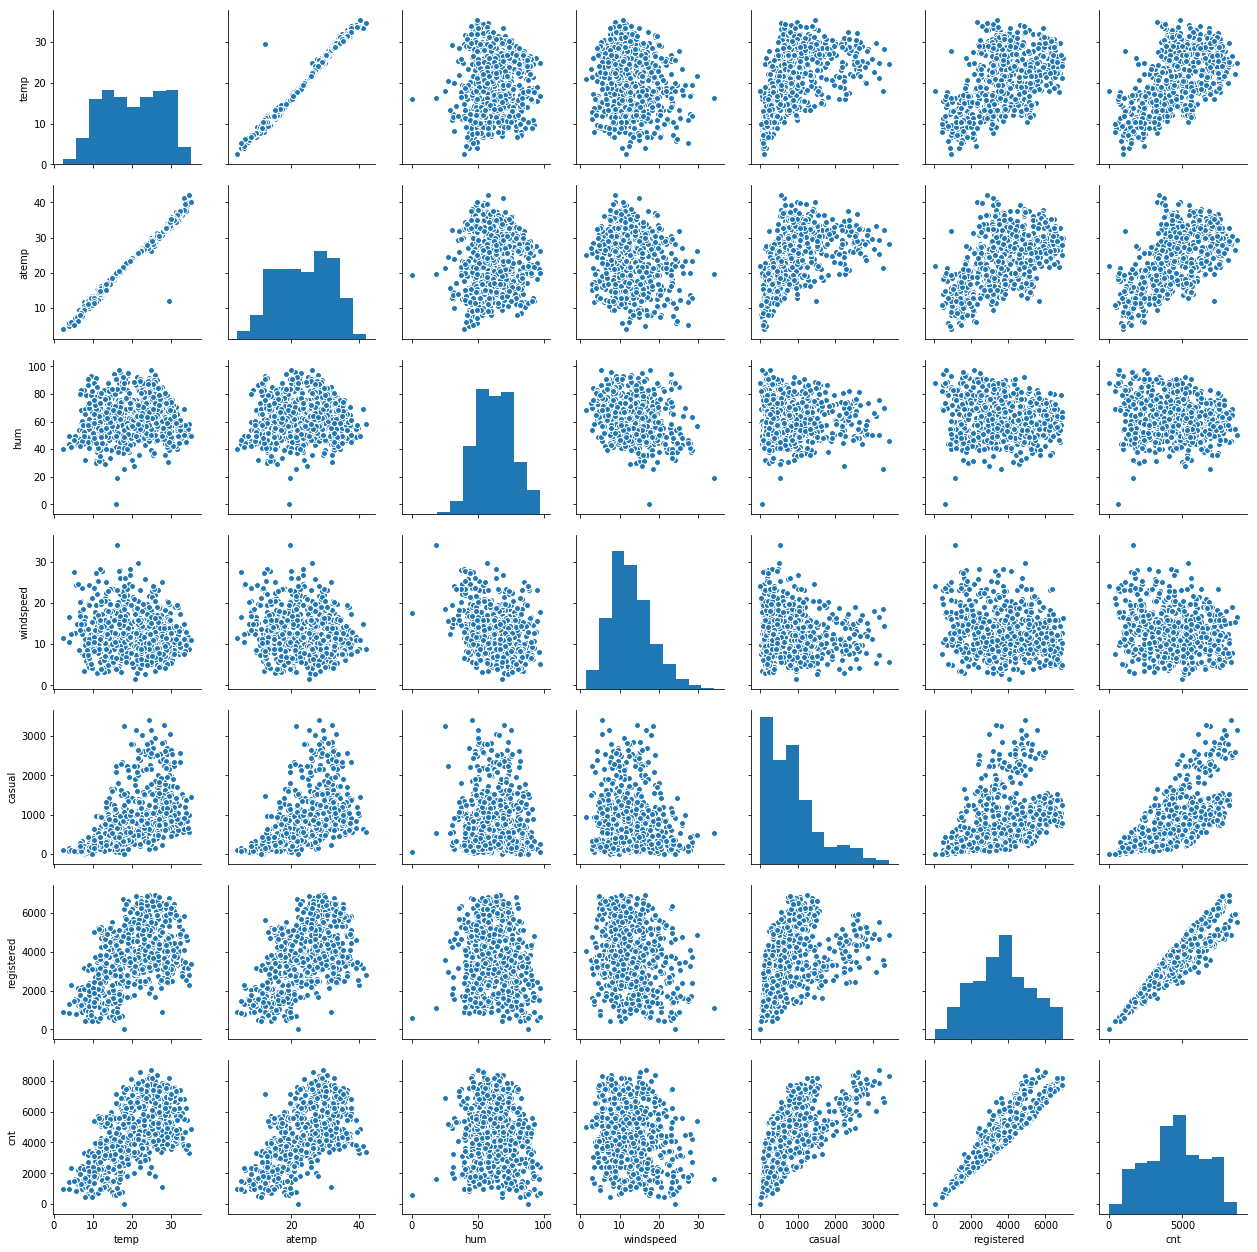

In [7]:
sns.pairplot(bike_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt' ]])
plt.show()

Observations:
1. Temp and feeling temperature are highly correlated 
2. Casual and registered should not be in the modelling variables. There are same as cnt. We cannot use these variables for future predictions 



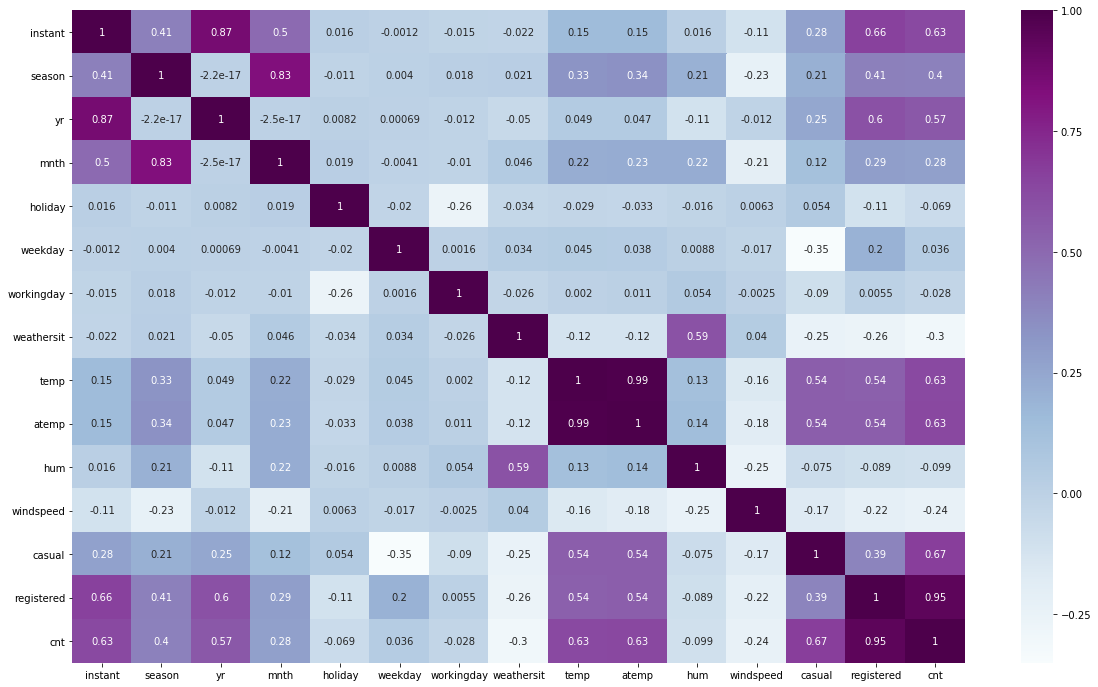

In [8]:
plt.figure(figsize=(20, 12))
sns.heatmap(bike_df.corr(),cmap='BuPu', annot= True)
plt.show()

Dropping columns instance its like index, casual, registered and atemp

In [9]:
bike_df.drop(columns=['instant', 'atemp', 'casual', 'registered', 'dteday'], inplace=True)

In [10]:
bike_df['season']=bike_df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike_df['mnth']=bike_df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike_df['weathersit']=bike_df.weathersit.map({1: 'clear',2:'mist_cloudy',3:'light_snow',4:'heavy_rain'})
bike_df['weekday']=bike_df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,mist_cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,mist_cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,43.6957,12.522300,1600


In [11]:
bike_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64

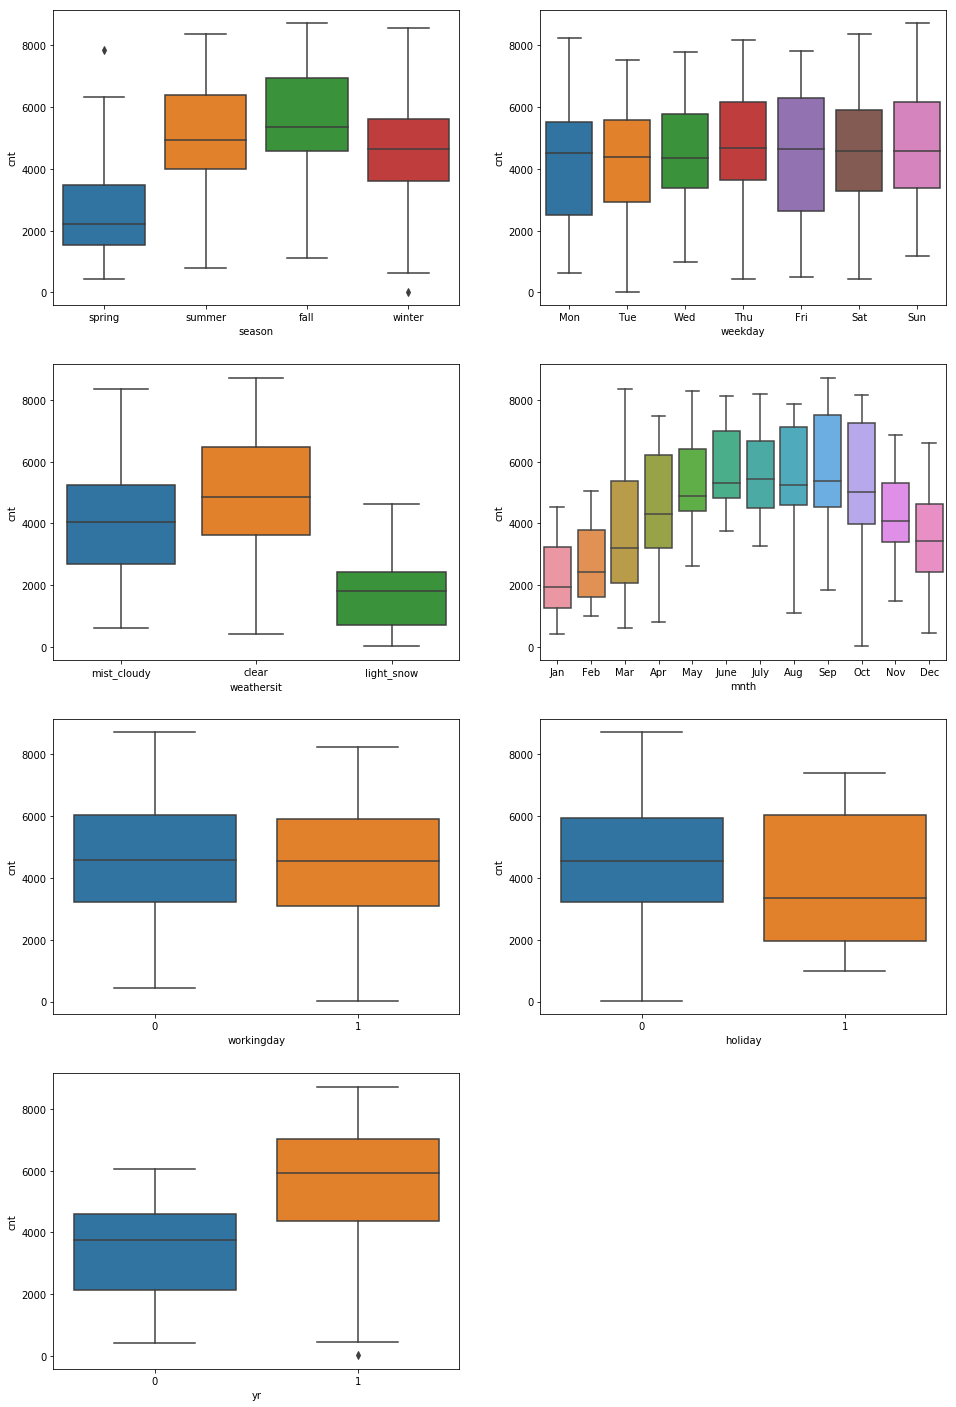

In [12]:
plt.figure(figsize=(16, 25))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(4,2,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(4,2,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(4,2,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(4,2,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(4,2,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(4,2,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)


plt.show()

Observation:
1. We can observe seasons, weather,yr and mnth has some good insights
2. Summer and fall has more rentals compared to fall and spring 
3. When weather is clear more rentals are observed, low rentals during snow
4. During summer months we see rise in rentals and low during winter
5. 2019 has rise in rentals comapared to 2018
6. working day and weekday does not provide useful info on rentals, will keep these for further analysis

<h3>Data preperation for modelling</h3>

In [13]:
#getting dummies variables 
mnth = pd.get_dummies(bike_df.mnth, drop_first=True)
weekday = pd.get_dummies(bike_df.weekday, drop_first=True)
weathersit = pd.get_dummies(bike_df.weathersit, drop_first=True)
season = pd.get_dummies(bike_df.season, drop_first=True)

In [14]:
mnth.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [15]:
bike_lr_raw= pd.concat([bike_df, mnth, weekday, weathersit, season], axis =1 )
bike_lr_raw.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sat,Sun,Thu,Tue,Wed,light_snow,mist_cloudy,spring,summer,winter
0,spring,0,Jan,0,Mon,1,mist_cloudy,14.110847,80.5833,10.749882,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Tue,1,mist_cloudy,14.902598,69.6087,16.652113,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,Jan,0,Wed,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,Jan,0,Thu,1,clear,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [16]:
bike_lr_raw.shape

(730, 33)

In [17]:
#dropping categorical variables with string
bike_lr_raw.drop(columns= ['season', 'mnth', 'weekday', 'weathersit'], inplace = True)
bike_lr_raw.shape

(730, 29)

<h3>Splitting data for train and test</h3>

In [18]:

np.random.seed(0)
df_train, df_test = train_test_split(bike_lr_raw, train_size = 0.7, test_size = 0.3, random_state = 100)

In [19]:
df_train.shape, df_test.shape

((510, 29), (219, 29))

<h3> Re scaling </h3>
Re scaling or standardising is required for cnt, wind speed, temperature, humidity. If not the coffeficants will have very different ranges. 

In [20]:
rescale= MinMaxScaler()

In [21]:
rescale_features= ['temp', 'hum', 'cnt', 'windspeed']
df_train[rescale_features]= rescale.fit_transform(df_train[rescale_features])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,light_snow,mist_cloudy,spring,summer,winter
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,...,0,0,0,0,1,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [22]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,light_snow,mist_cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.096078,0.084314,0.066667,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.294988,0.278131,0.249689,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [23]:
df_train.corr()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,light_snow,mist_cloudy,spring,summer,winter
yr,1.000000,-0.014980,-0.003005,0.107288,-0.084792,-0.001108,0.591508,0.054774,-0.040049,-1.991603e-02,...,-0.017733,0.016537,0.032785,0.026024,0.010995,-6.076399e-02,-0.015469,-0.036320,0.013856,-0.022638
holiday,-0.014980,1.000000,-0.254149,-0.066282,-0.029093,0.017569,-0.095961,-0.052728,-0.004302,5.652428e-02,...,-0.025291,-0.028355,-0.066102,0.034971,0.190636,-2.815377e-02,-0.038279,0.053339,-0.063232,0.050712
workingday,-0.003005,-0.254149,1.000000,-0.007643,0.020701,-0.002504,-0.008723,-0.012875,-0.025020,-3.470925e-03,...,-0.605864,-0.626783,0.260091,0.234321,0.163120,8.289412e-03,-0.068924,-0.032886,0.030488,0.036097
temp,0.107288,-0.066282,-0.007643,1.000000,0.155415,-0.187396,0.643517,0.387456,-0.272869,-2.960214e-01,...,0.025276,0.006854,0.074973,-0.001951,-0.046291,-3.609266e-02,-0.090161,-0.605988,0.125582,-0.233697
hum,-0.084792,-0.029093,0.020701,0.155415,1.000000,-0.266895,-0.059993,0.053185,0.057832,-1.295442e-01,...,0.002783,-0.027388,-0.056997,0.033548,0.026395,2.450381e-01,0.481042,-0.201134,-0.013216,0.171579
windspeed,-0.001108,0.017569,-0.002504,-0.187396,-0.266895,1.000000,-0.253794,-0.111243,-0.060975,1.331228e-01,...,-0.016284,0.018278,-0.021502,0.035616,-0.057518,8.689990e-02,-0.030385,0.180743,0.110089,-0.090649
cnt,0.591508,-0.095961,-0.008723,0.643517,-0.059993,-0.253794,1.000000,0.227229,-0.143598,-2.702870e-01,...,0.012496,0.031237,0.110430,-0.018885,-0.019578,-2.265984e-01,-0.175530,-0.548871,0.134343,0.032636
Aug,0.054774,-0.052728,-0.012875,0.387456,0.053185,-0.111243,0.227229,1.000000,-0.098929,-8.713318e-02,...,0.032882,0.005308,0.018738,-0.064591,0.007209,-5.675323e-02,0.016625,-0.184784,-0.185769,-0.187737
Dec,-0.040049,-0.004302,-0.025020,-0.272869,0.057832,-0.060975,-0.143598,-0.098929,1.000000,-8.109830e-02,...,-0.011872,0.043024,-0.083721,-0.011302,0.003762,-1.105587e-02,0.018507,0.041868,-0.172902,0.314816
Feb,-0.019916,0.056524,-0.003471,-0.296021,-0.129544,0.133123,-0.270287,-0.087133,-0.081098,1.000000e+00,...,-0.032786,0.007614,0.025438,0.017471,0.009193,-1.133121e-16,-0.011038,0.471540,-0.152286,-0.153900


<h2> Model building </h2>

In [24]:
y_train = df_train.pop('cnt')
X_train = df_train

In [25]:


# Add a constant
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

In [26]:
lr.params

const          0.394543
yr             0.230857
holiday       -0.135424
workingday    -0.060524
temp           0.445458
hum           -0.157315
windspeed     -0.183046
Aug            0.021507
Dec           -0.045669
Feb           -0.037279
Jan           -0.063612
July          -0.034910
June           0.000975
Mar            0.000608
May            0.024064
Nov           -0.041555
Oct            0.005790
Sep            0.086055
Mon           -0.024633
Sat           -0.056319
Sun           -0.049961
Thu            0.003863
Tue           -0.026299
Wed           -0.011241
light_snow    -0.251511
mist_cloudy   -0.059355
spring        -0.043705
summer         0.042243
winter         0.110897
dtype: float64

In [27]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          4.33e-179
Time:                        01:30:23   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3945      0.085      4.640      

In [28]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,63.89
3,temp,43.99
4,hum,41.17
25,spring,13.54
27,winter,12.51
19,Sun,12.35
18,Sat,11.83
26,summer,9.84
14,Nov,7.16
15,Oct,6.96


In [29]:
#creating the RFE object
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()
lm.fit(X_train, y_train)
# X_train_lm = sm.add_constant(X_train)

# lr = sm.OLS(y_train, X_train_lm).fit()
#selecting top 15 features
rfe = RFE(lm, n_features_to_select = 15) 

#fitting rfe ofject on our training dataset
rfe = rfe.fit(X_train, y_train)

In [30]:
# vhigh_p_cols=['June', 'Mar', 'Thu', 'Oct', 'Sat']
# X_train_1= X_train.drop(columns= vhigh_p_cols, inplace=False)
# X_train_1.shape, X_train.shape

In [31]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 12),
 ('Tue', False, 7),
 ('Wed', False, 10),
 ('light_snow', True, 1),
 ('mist_cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [32]:
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Dec', 'Jan', 'July',
       'Nov', 'Sep', 'light_snow', 'mist_cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')

In [33]:
def stat_model_params_summary(cols, const=True, predict_train= False):
    X_train_filter = X_train[cols]
    #adding constant to training variable
    if const:
        X_train_filter = sm.add_constant(X_train_filter)


    lr = sm.OLS(y_train, X_train_filter)
    lr_model = lr.fit()
    #print("params \n",lr_model.params)
    print(lr_model.summary())
    if predict_train:
        y_train_predicted = lr_model.predict(X_train_filter)
        return y_train_predicted, lr_model
    
        

In [34]:
stat_model_params_summary(rfe_cols, True)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          3.34e-189
Time:                        01:30:23   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3202      0.036      8.886      

Observation:
1. With only top 15 feature the explainability is 84.5%, While using all features R-squared was 85% which is very close

In [35]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def vif_cal(cols):
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    display(vif)

In [36]:
vif_cal(rfe_cols)

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.81
11,mist_cloudy,2.32
0,yr,2.09
8,Nov,1.83
6,Jan,1.75


 will remove humidity because it has vey high p value and vif value 

In [37]:

selected_cols= list(rfe_cols)
selected_cols.remove('hum')

In [38]:
selected_cols

['yr',
 'holiday',
 'temp',
 'windspeed',
 'Dec',
 'Jan',
 'July',
 'Nov',
 'Sep',
 'light_snow',
 'mist_cloudy',
 'spring',
 'summer',
 'winter']

In [39]:
stat_model_params_summary(selected_cols, True)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          1.57e-186
Time:                        01:30:24   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2466      0.032      7.679      

In [40]:
vif_cal(selected_cols)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,winter,2.94
11,spring,2.89
12,summer,2.23
0,yr,2.07
7,Nov,1.80
5,Jan,1.66
6,July,1.59
10,mist_cloudy,1.56


Since temp has very high coeff and 0 p value will try removing Nov with very high p value

In [41]:
selected_cols.remove('Nov')

In [42]:
stat_model_params_summary(selected_cols, True)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          1.20e-186
Time:                        01:30:24   Log-Likelihood:                 503.13
No. Observations:                 510   AIC:                            -978.3
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2288      0.031      7.334      

In [43]:
vif_cal(selected_cols)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
10,spring,2.89
11,summer,2.23
0,yr,2.07
12,winter,2.06
5,Jan,1.65
6,July,1.59
9,mist_cloudy,1.56
7,Sep,1.34


Removing Nov did not affect the model performance nor reduced the VIF. Will remove Dec next and check the performace 

In [44]:
selected_cols.remove('Dec')

In [45]:
stat_model_params_summary(selected_cols, True)
vif_cal(selected_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          3.97e-187
Time:                        01:30:24   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2155      0.030      7.096      

,Features,VIF
2,temp,5.13
3,windspeed,4.61
9,spring,2.75
10,summer,2.22
0,yr,2.07
11,winter,1.79
4,Jan,1.61
5,July,1.59
8,mist_cloudy,1.56
6,Sep,1.34


Removing Jan becasue of high P-value, removing Dec did not affect the model performance. 

In [46]:
selected_cols.remove('Jan')

In [47]:
stat_model_params_summary(selected_cols, True)
vif_cal(selected_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          2.40e-187
Time:                        01:30:24   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1996      0.030      6.758      

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.21
8,spring,2.08
0,yr,2.07
10,winter,1.79
4,July,1.58
7,mist_cloudy,1.55
5,Sep,1.34
6,light_snow,1.08


Removing Jan did not affect the model performace but reduced the VIF for temp<br>. 
Removing July.

In [48]:
selected_cols.remove('July')

In [49]:
stat_model_params_summary(selected_cols, True)
vif_cal(selected_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          7.36e-187
Time:                        01:30:24   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1910      0.030      6.456      

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,yr,2.07
7,spring,1.99
8,summer,1.89
9,winter,1.63
6,mist_cloudy,1.54
4,Sep,1.23
5,light_snow,1.08
1,holiday,1.04


Removing July column did not affect the model performace much but also reduced the VIF for temp. <br>
All VIF values are below 5, good R squared and Adj R squared and low P-values for all variables. <br>
Selecting this as the final model.

<h2> Residual Analysis </h2>
Checking if errors are normally distributed.

In [50]:
y_train_predict, final_model= stat_model_params_summary(selected_cols, True, True)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          7.36e-187
Time:                        01:30:24   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1910      0.030      6.456      

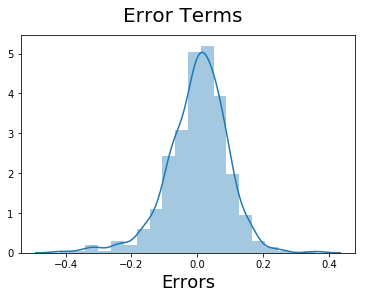

In [74]:
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)  
plt.show()

The erros are normally distributed as the assumption

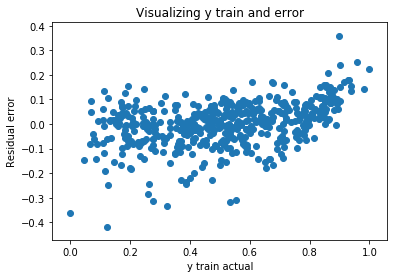

In [76]:
plt.scatter(y_train, y_train - y_train_predict)
plt.xlabel('y train actual')
plt.ylabel('Residual error')
plt.title('Visualizing y train and error')
plt.show()

Checking the assumption, if error terms are dependent on each other or the previous value.Looking at the graph they are not 

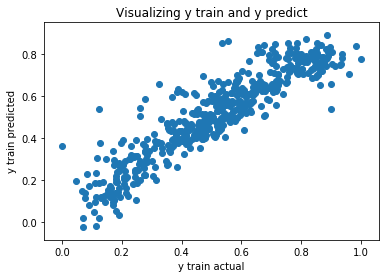

In [73]:
plt.scatter(y_train, y_train_predict)
plt.xlabel('y train actual')
plt.ylabel('y train predicted')
plt.title('Visualizing y train and y predict')
plt.show()

Ideally would be to see a linear relation, since we want y actuals and predictions to be the same. Seeing a linear relationship means the model explanabilty is good

<h2> prediction using selected model </h2>

In [52]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,light_snow,mist_cloudy,spring,summer,winter
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,1,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [53]:
rescale_features= ['temp', 'hum', 'cnt', 'windspeed']
df_test[rescale_features]= rescale.transform(df_test[rescale_features])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,light_snow,mist_cloudy,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,1,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [54]:
y_test = df_test.pop('cnt')
X_test = df_test

In [56]:
X_test = sm.add_constant(X_test[selected_cols])
y_test_pred = final_model.predict(X_test)

In [59]:
from sklearn.metrics import r2_score
print("r2 score for train data ")
r2_score(y_train, y_train_predict)

r2 score for train data 


0.833170119099662

In [60]:
print("r2 score for test data")
r2_score(y_test, y_test_pred)

r2 score for test data


0.8035441330582012

In [62]:
final_model.params

const          0.190994
yr             0.234060
holiday       -0.096865
temp           0.478177
windspeed     -0.148155
Sep            0.090932
light_snow    -0.286002
mist_cloudy   -0.080124
spring        -0.055092
summer         0.060987
winter         0.095929
dtype: float64

Summary:
1. The model has simliar performance with unknown test data. 
2. 80% of data can be explained by 10 variables. 
3. 0.23*yr -0.09*holiday + 0.47*temperature - 0.14*windspeed + 0.09*september - 0.28*light snow -0.08* misty -0.05*spring+ 0.06*summer +0.09*winter
4. Top drivers are temperature, higher the temperature the hiher number of bike rentals
5. High wind speed and snow decline the number of bike rentals 
6. Year 2019 has more number of rentals compared to year 2018
7. Summer and winter positivly affect the rentals.